In [28]:
import sklearn as skl
import sys
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
import numpy as np

In [29]:
np.set_printoptions(threshold=sys.maxsize)

In [30]:
df = pd.read_excel('DataVisualization.xlsx')

In [51]:
df_copy = df.copy()

In [31]:
print(df)

                          Quality  Control Display Unit  \
0                        Accuracy                     5   
1               Understandability                     5   
2                        Feedback                     4   
3              Distinguishability                     5   
4             Limitations of user                     4   
5                 Configurability                     1   
6             Situationally aware                     4   
7                        Reliable                     5   
8                       Redundany                     4   
9                Error Management                     4   
10  Trainability and Learnability                     3   
11               User's attention                     4   
12                 Usage patterns                     4   
13      User aware of limitations                     2   
14                    Validatable                     3   
15                     Efficiency                     4 

In [32]:
meltedDf = df.melt('Quality', var_name='Instruments', value_name='values')

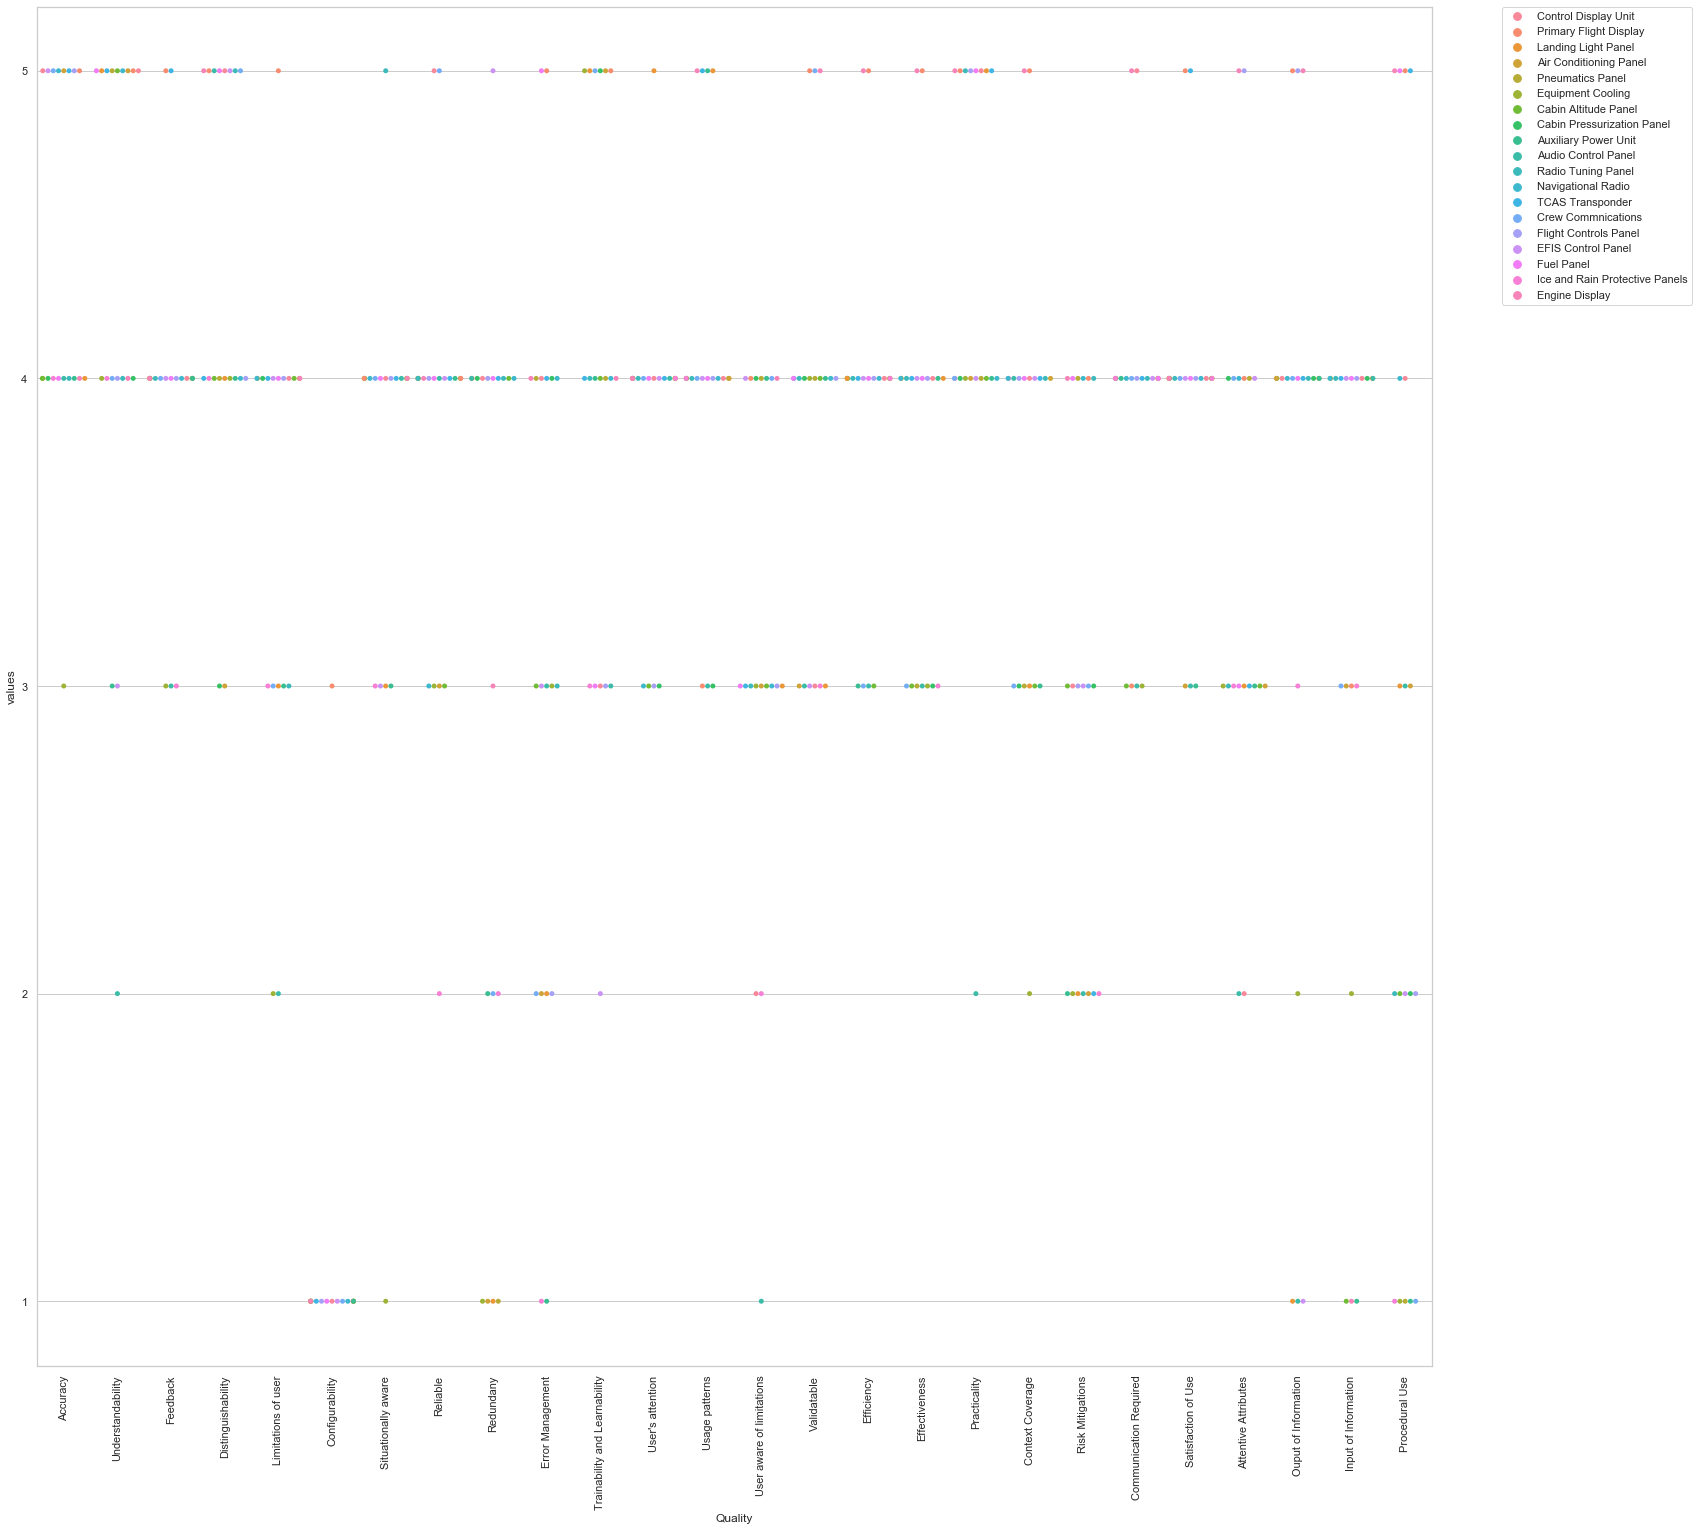

In [33]:
y = [1, 2, 3, 4, 5]
yint = range(min(y), math.ceil(max(y))+1)
sns.set(style="whitegrid", color_codes=True)
g = sns.swarmplot(x="Quality", y="values", hue='Instruments', data=meltedDf)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.rcParams['figure.figsize'] = [25, 25]
plt.yticks(yint)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

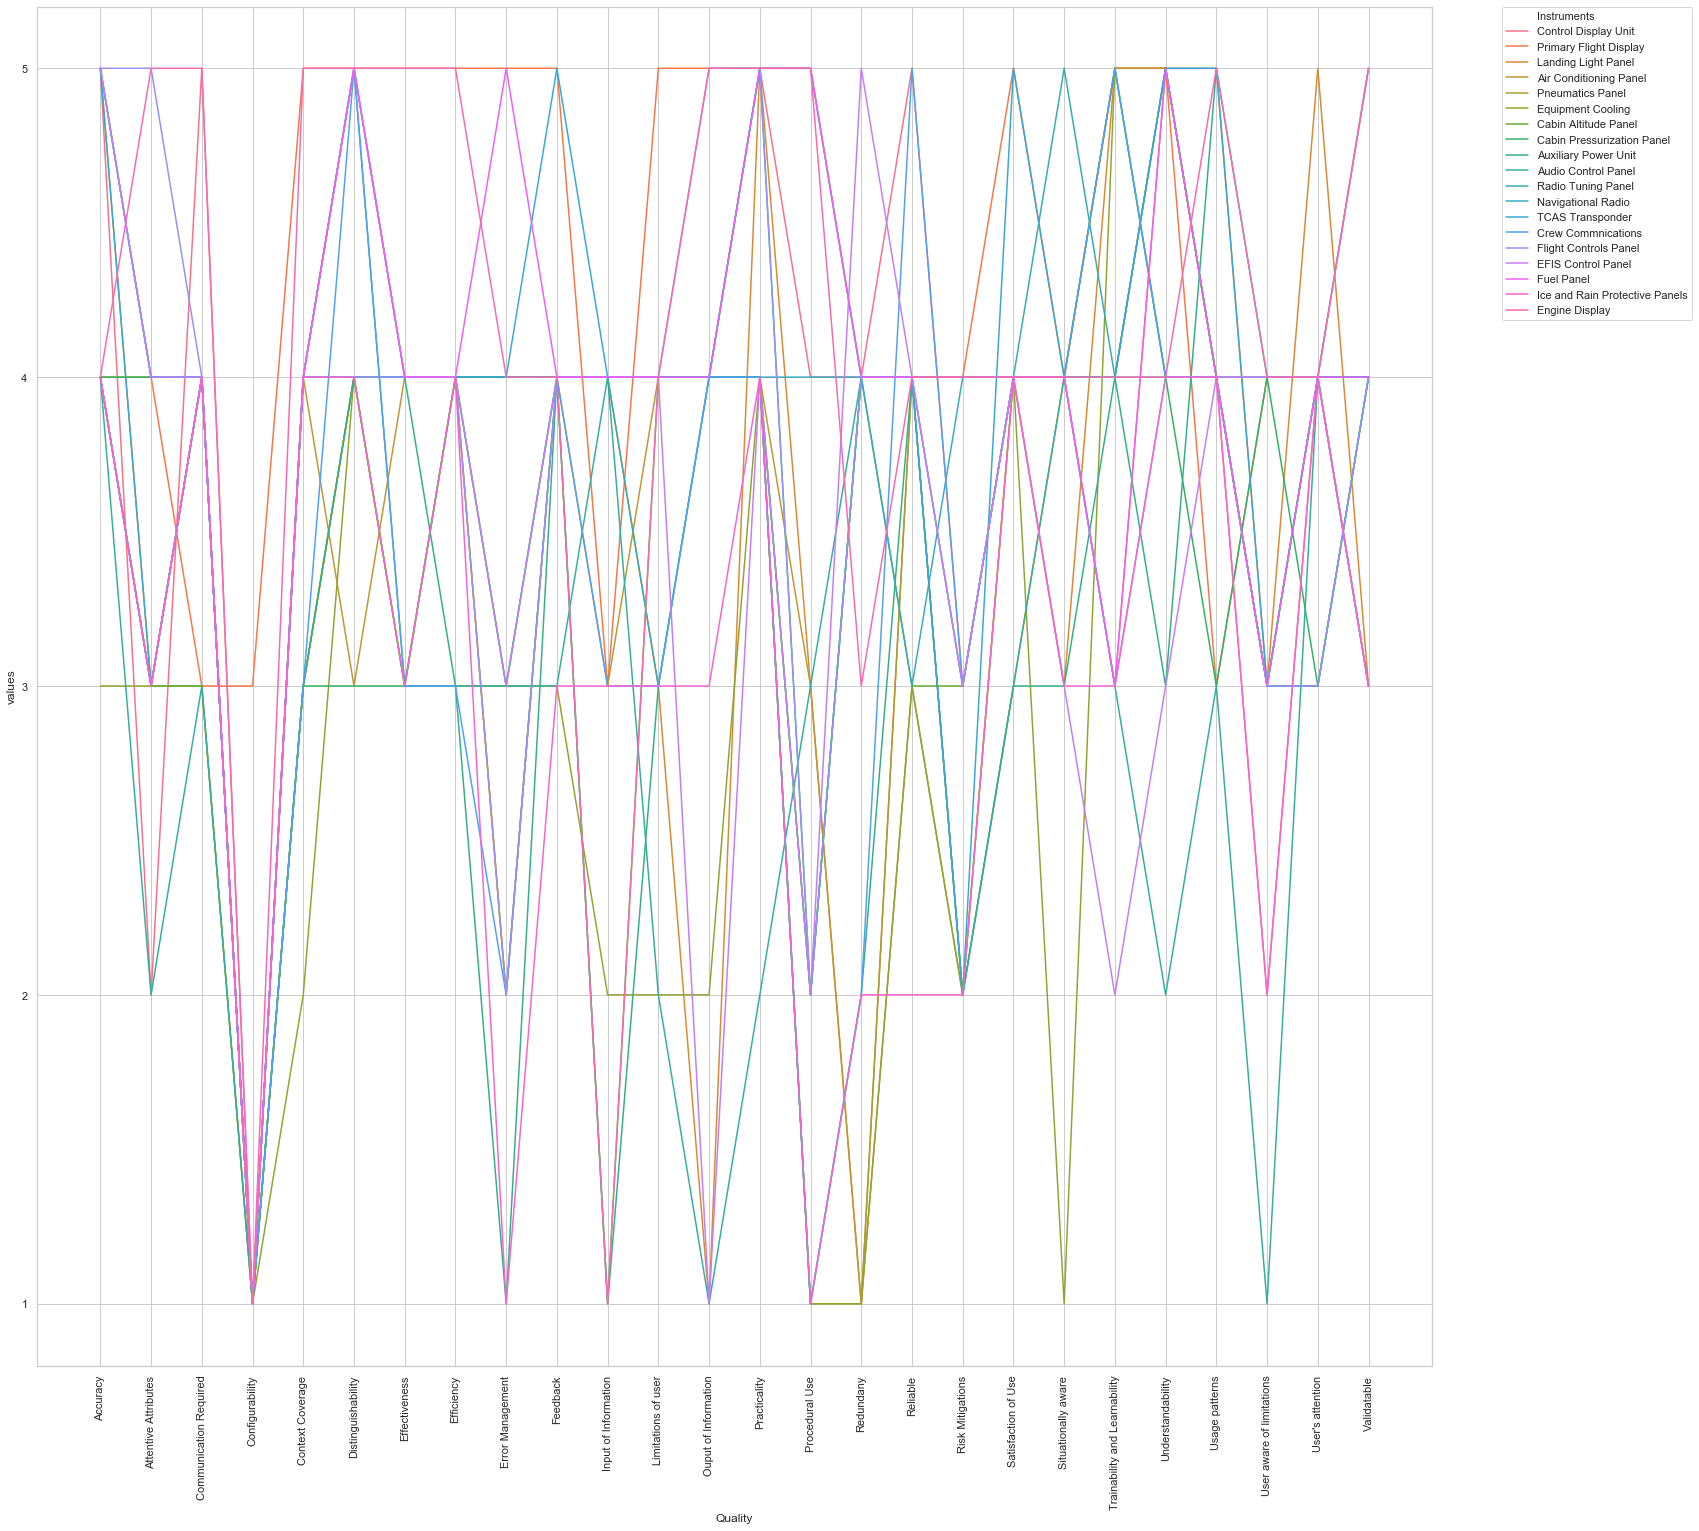

In [34]:
y = [1, 2, 3, 4, 5]
yint = range(min(y), math.ceil(max(y))+1)
g = sns.lineplot(x="Quality", y="values", hue='Instruments', data=meltedDf)
plt.yticks(yint)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [35]:
X = df.iloc[:,1:].values

In [36]:
print(X)

[[5 5 4 5 4 3 4 4 4 4 4 5 5 5 5 5 4 4 4]
 [5 5 5 5 5 4 5 4 3 2 4 5 5 4 4 3 5 4 4]
 [4 5 4 4 4 3 4 4 4 3 4 4 5 4 4 4 4 3 4]
 [5 5 4 3 4 4 4 3 4 5 5 4 4 5 4 5 5 4 5]
 [4 5 3 4 4 2 4 4 3 2 3 4 4 3 4 4 4 3 4]
 [1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [4 4 3 4 4 1 4 4 3 4 5 4 4 4 4 3 4 3 4]
 [5 4 4 3 4 3 3 4 4 4 4 3 4 5 4 4 4 2 4]
 [4 4 1 1 1 1 4 4 2 4 4 4 4 2 4 5 4 2 3]
 [4 5 2 2 4 3 3 4 1 3 3 4 4 2 2 3 5 1 4]
 [3 5 5 5 4 5 4 5 4 3 4 4 4 5 3 2 3 3 4]
 [4 4 5 4 4 4 3 3 4 4 4 3 4 4 3 4 4 4 4]
 [4 3 5 4 4 4 4 3 5 3 4 4 5 4 4 4 4 4 5]
 [2 4 3 3 4 3 3 4 4 1 3 3 3 4 3 4 3 2 4]
 [3 5 3 3 4 4 4 4 4 3 4 4 4 5 4 3 4 3 5]
 [4 5 4 4 4 4 3 4 3 3 4 4 4 3 4 4 4 4 5]
 [4 5 4 4 3 3 3 3 4 3 4 4 4 3 4 4 4 3 5]
 [5 5 5 4 4 4 4 4 4 2 5 4 5 4 5 4 5 4 5]
 [4 5 3 4 3 2 3 3 3 4 4 4 4 3 4 4 4 4 5]
 [3 4 2 2 4 2 3 3 2 2 4 4 2 3 3 3 4 2 4]
 [5 3 4 4 4 3 3 4 4 3 4 4 4 4 4 4 4 4 5]
 [4 5 4 3 4 4 4 4 3 3 4 4 5 4 4 4 4 4 4]
 [2 4 3 3 4 3 3 4 3 2 3 4 3 4 5 4 3 3 5]
 [4 5 1 4 4 2 4 4 4 1 4 4 4 4 5 1 4 3 5]
 [4 3 4 3 4 2 1 

In [37]:
from sklearn.cluster import KMeans

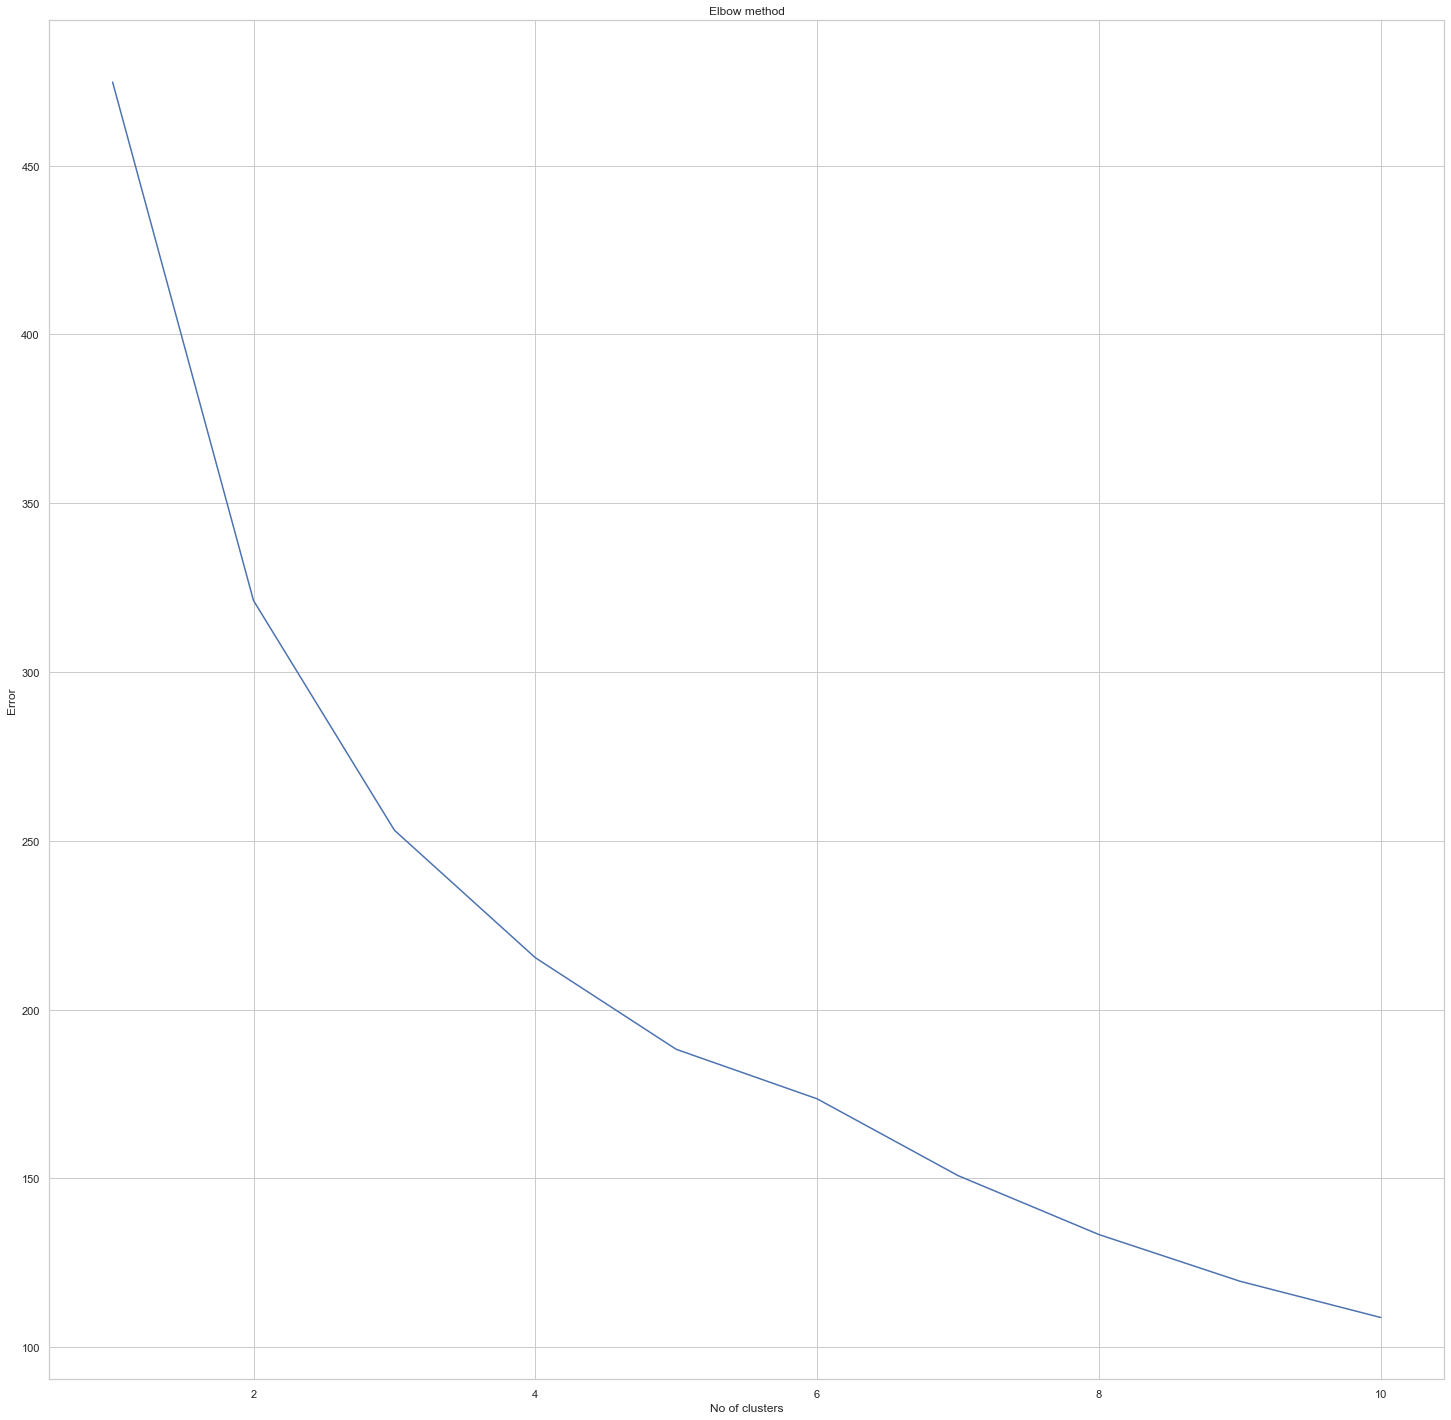

In [38]:
## Elbow method
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(X)
    kmeans.fit(X)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [39]:
km = KMeans(
    n_clusters=4, init='random',
    n_init=30, max_iter=600,
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)
print(y_km)

[1 1 1 1 0 3 0 1 2 2 1 1 1 0 1 1 1 1 0 0 1 1 0 0 2 2]


In [40]:
km.cluster_centers_

array([[3.28571429, 4.42857143, 2.57142857, 3.42857143, 3.85714286,
        2.14285714, 3.42857143, 3.71428571, 3.14285714, 2.28571429,
        3.71428571, 3.85714286, 3.42857143, 3.57142857, 4.        ,
        3.28571429, 3.71428571, 2.85714286, 4.42857143],
       [4.28571429, 4.57142857, 4.28571429, 3.92857143, 4.        ,
        3.71428571, 3.71428571, 3.78571429, 3.85714286, 3.21428571,
        4.14285714, 4.        , 4.42857143, 4.21428571, 4.        ,
        3.85714286, 4.14285714, 3.57142857, 4.5       ],
       [4.        , 4.25      , 2.5       , 2.25      , 2.5       ,
        1.75      , 2.5       , 3.5       , 1.25      , 3.5       ,
        3.25      , 4.        , 4.25      , 2.        , 3.        ,
        3.5       , 4.5       , 1.75      , 3.25      ],
       [1.        , 3.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.   

In [52]:
df_copy['Cluster'] = y_km
print(df_copy)

                          Quality  Control Display Unit  \
0                        Accuracy                     5   
1               Understandability                     5   
2                        Feedback                     4   
3              Distinguishability                     5   
4             Limitations of user                     4   
5                 Configurability                     1   
6             Situationally aware                     4   
7                        Reliable                     5   
8                       Redundany                     4   
9                Error Management                     4   
10  Trainability and Learnability                     3   
11               User's attention                     4   
12                 Usage patterns                     4   
13      User aware of limitations                     2   
14                    Validatable                     3   
15                     Efficiency                     4 

In [67]:
meltedDf2 = df.melt('Quality', var_name='Instruments', value_name='values')

In [68]:
print(meltedDf2)

                  Quality           Instruments  values
0                Accuracy  Control Display Unit       5
1       Understandability  Control Display Unit       5
2                Feedback  Control Display Unit       4
3      Distinguishability  Control Display Unit       5
4     Limitations of user  Control Display Unit       4
..                    ...                   ...     ...
489   Satisfaction of Use        Engine Display       4
490  Attentive Attributes        Engine Display       5
491  Ouput of Information        Engine Display       5
492  Input of Information        Engine Display       1
493        Procedural Use        Engine Display       5

[494 rows x 3 columns]


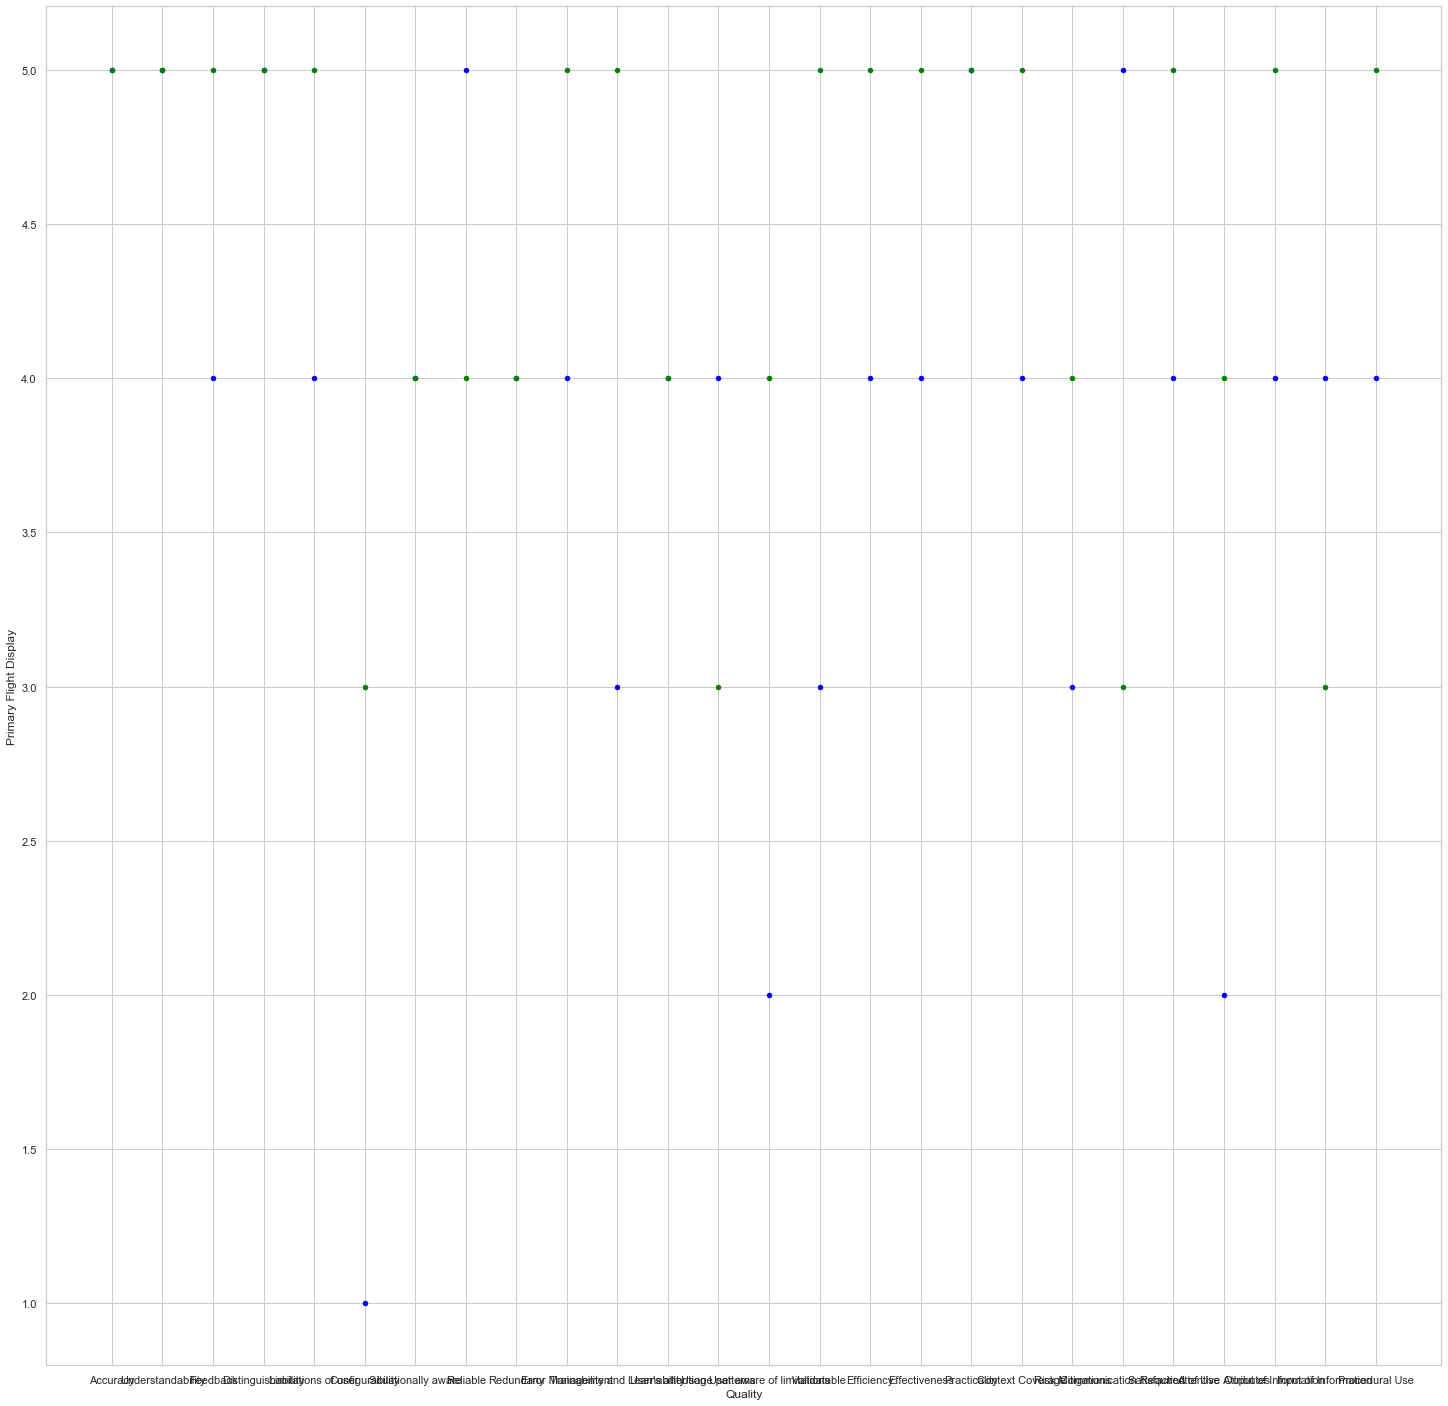

In [62]:
ax=plt.gca()
df_copy.plot(kind='scatter', x='Quality', y='Control Display Unit', color='blue', ax=ax)
df_copy.plot(kind='scatter', x='Quality', y='Primary Flight Display', color='green', ax=ax)

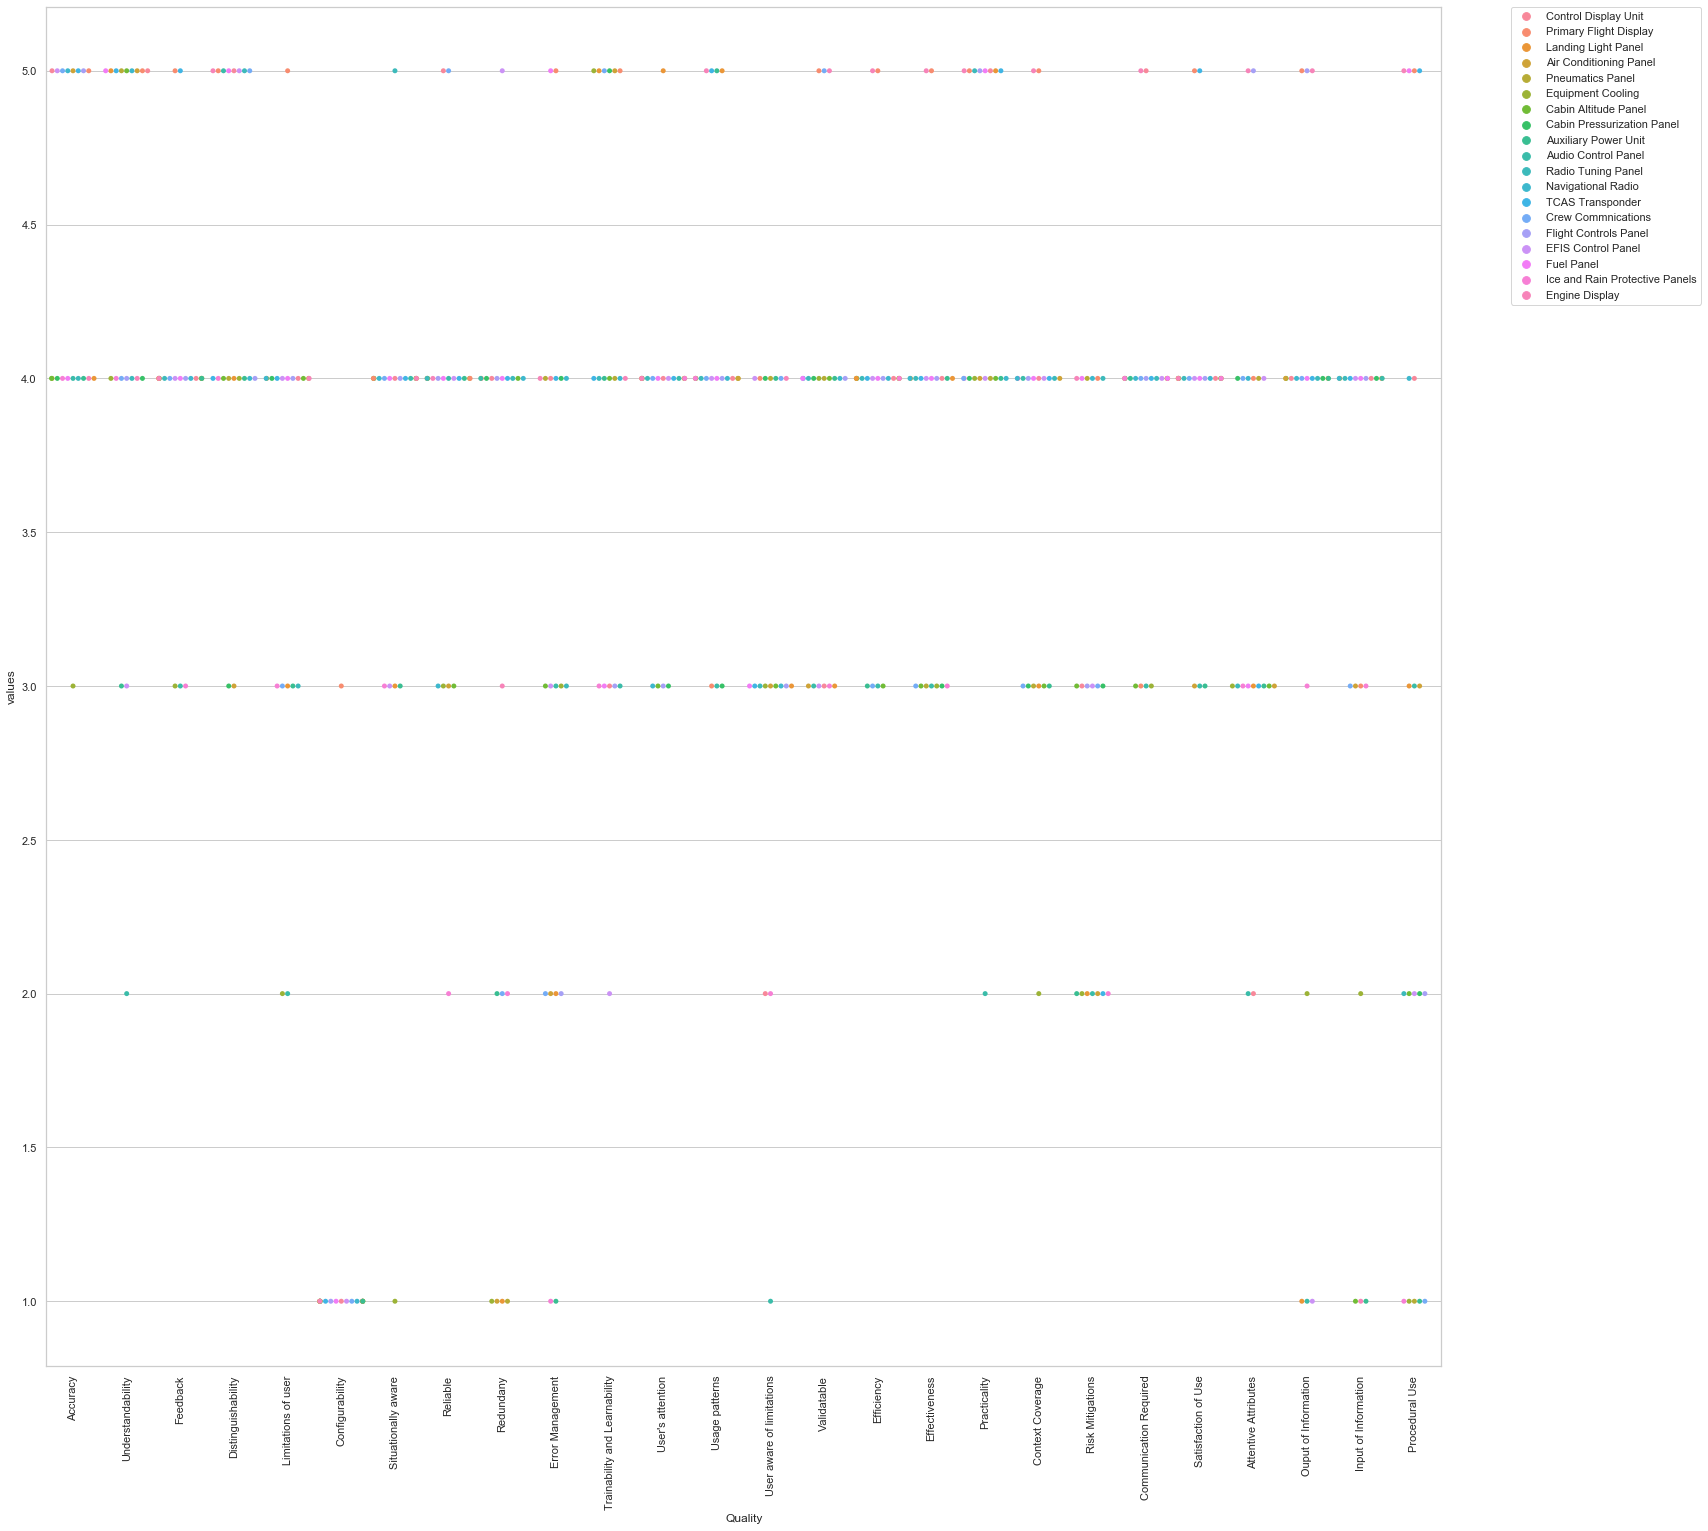

In [72]:
ax = plt.gca()
sns.set(style="whitegrid", color_codes=True)
g = sns.swarmplot(x="Quality", y="values", hue='Instruments', data=meltedDf2, ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)